In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,KFold,RepeatedKFold
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn import metrics,svm

In [2]:
colnames=['Age','Sex','Chest pain type','Blood pressure','Serum cholesterol level','Fasting blood sugar','Electrocardiographic results',
          'Maximum heart rate achieved','Exercise induced angina','ST depression induced by exercise relative to rest','the slope of the peak exercise ST segment',
          'Number of major vessels coloured by fluoroscopy','Thalassemia','Heart Disease'] 

df = pd.read_csv("heart.dat",sep = "\s+",names=colnames)

df['Heart Disease'] = df['Heart Disease']-1
df.head(5)

,Age,Sex,Chest pain type,Blood pressure,Serum cholesterol level,Fasting blood sugar,Electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,Number of major vessels coloured by fluoroscopy,Thalassemia,Heart Disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


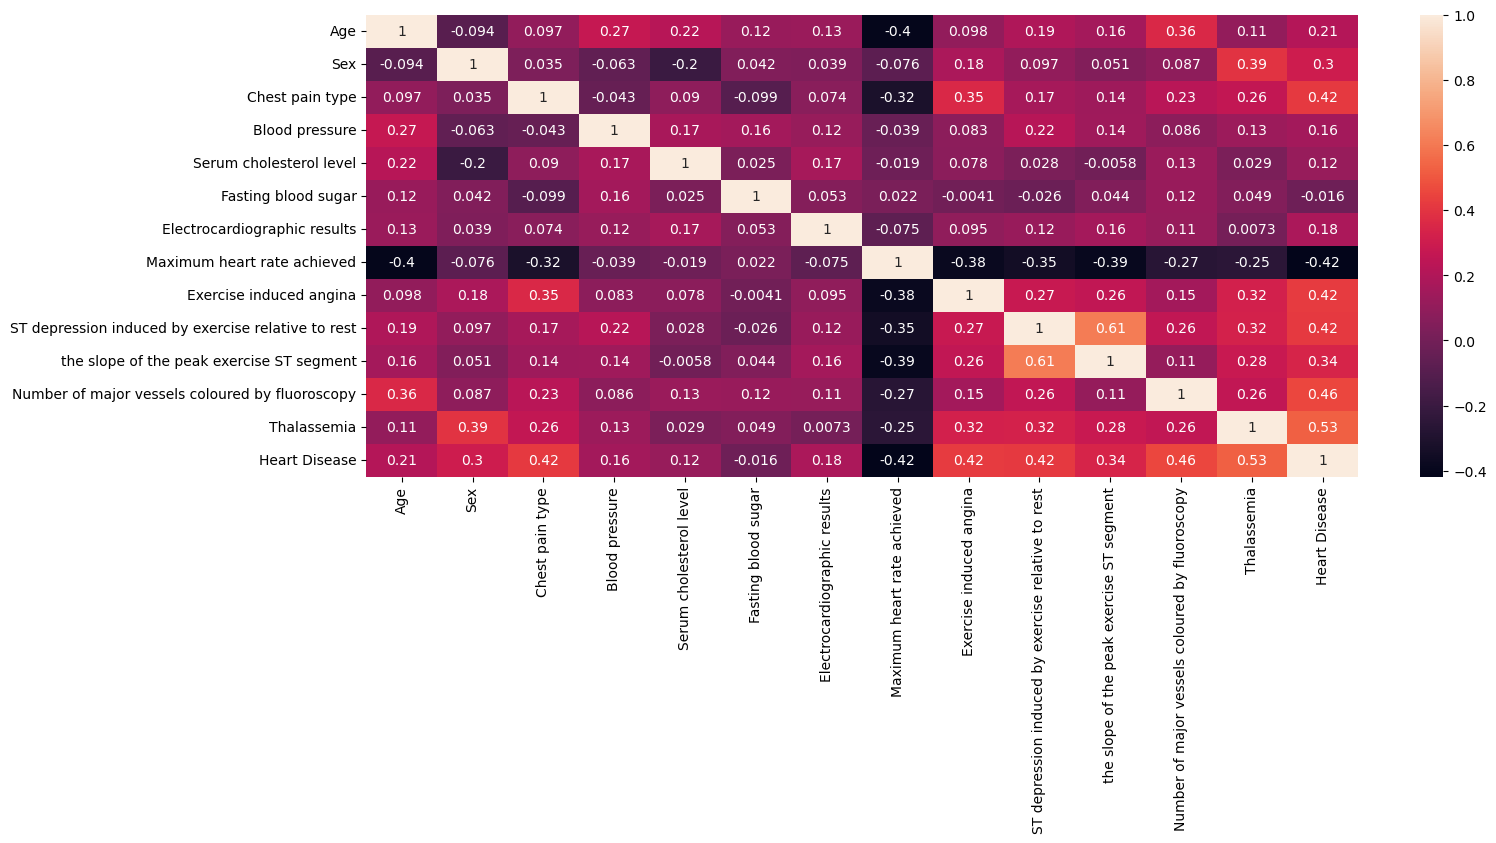

In [3]:

corr = df.corr()
plt.figure(figsize=(16, 6))
corr_map = sns.heatmap(corr, annot=True)

In [4]:
X=df.drop(['Heart Disease'],axis=1)
Y=df['Heart Disease']
X.shape

(270, 13)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

Accuracy: 62.96 %
Precision: 0.53
Recall: 0.38
Specificity: 0.79
F1-score: 0.44
[0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1]
[1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


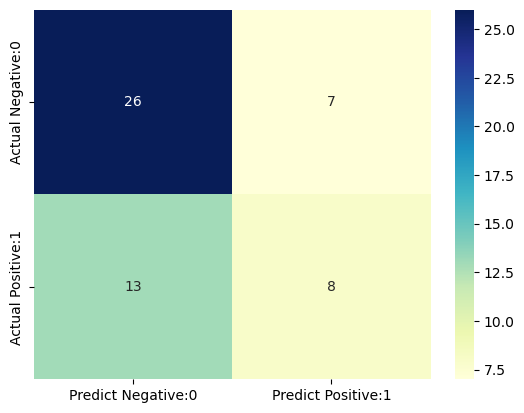

In [11]:
model = svm.SVC()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
spec = metrics.recall_score(Y_test,Y_pred,pos_label=0)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)
print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("Specificity: %.2f" % spec)
print("F1-score: %.2f" % f1)

cf_matrix = pd.DataFrame(data=cf, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(Y_pred)
print(np.array(Y_test))

In [8]:
#Hyperparameter tuning
grid = dict()
grid['C'] = np.arange(0.1,1,0.1)
grid['gamma'] = [0.01,0.1,1,10,100]
grid['kernel']=['rbf']
search = GridSearchCV(svm.SVC(),grid,cv=5)
results = search.fit(X_train,Y_train)
print("Best parameters = ",results.best_params_,"\n") 
print("Best score = ",results.best_score_,"\n") 
model_tuned = svm.SVC(**results.best_params_)

Best parameters =  {'C': 0.8, 'gamma': 0.01, 'kernel': 'rbf'} 

Best score =  0.564799154334038 



Accuracy: 66.67 %
Precision: 0.64
Recall: 0.33
Specificity: 0.88
F1-score: 0.44
[0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


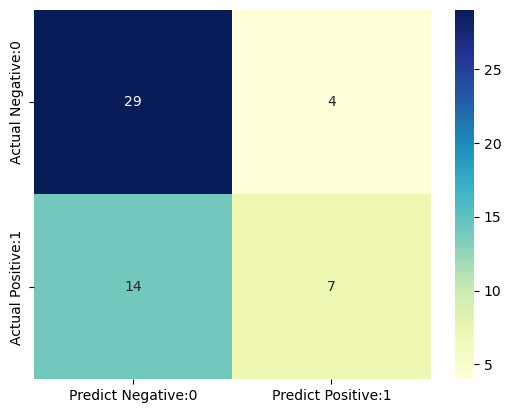

In [10]:
model_tuned.fit(X_train, Y_train)
Y_pred = model_tuned.predict(X_test)
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
spec = metrics.recall_score(Y_test,Y_pred,pos_label=0)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)
print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("Specificity: %.2f" % spec)
print("F1-score: %.2f" % f1)
cf_matrix = pd.DataFrame(data=cf, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(Y_pred)
print(np.array(Y_test))

In [18]:
#Hyperparameter tuning
grid = dict()
grid['C'] = np.arange(0.1,1,0.1)
grid['kernel']=['poly']
grid['coef0']=np.arange(0.1,10,1)
search = GridSearchCV(svm.SVC(),grid,cv=5)
results = search.fit(X_train,Y_train)
print("Best parameters = ",results.best_params_,"\n") 
print("Best score = ",results.best_score_,"\n") 
model_tuned = svm.SVC(**results.best_params_)

Best parameters =  {'C': 0.9, 'coef0': 9.1, 'kernel': 'poly'} 

Best score =  0.7918604651162792 



Accuracy: 87.04 %
Precision: 1.00
Recall: 0.67
Specificity: 1.00
F1-score: 0.80
[1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
[1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1]


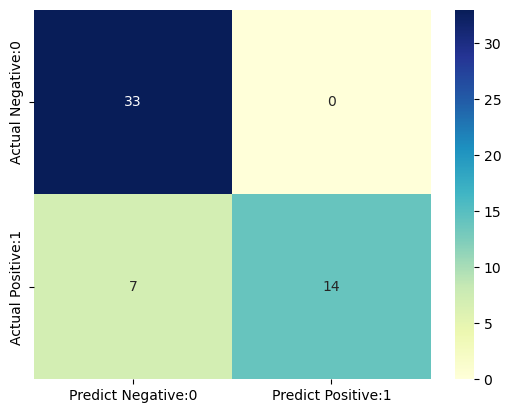

In [19]:
model_tuned.fit(X_train, Y_train)
Y_pred = model_tuned.predict(X_test)
acc = metrics.accuracy_score(Y_test,Y_pred)*100
pre = metrics.precision_score(Y_test,Y_pred)
rec = metrics.recall_score(Y_test,Y_pred)
spec = metrics.recall_score(Y_test,Y_pred,pos_label=0)
f1 = 	metrics.f1_score(Y_test,Y_pred)
cf = metrics.confusion_matrix(Y_test,Y_pred)
print("Accuracy: %.2f" % acc,"%")
print("Precision: %.2f" % pre)
print("Recall: %.2f" % rec)
print("Specificity: %.2f" % spec)
print("F1-score: %.2f" % f1)

cf_matrix = pd.DataFrame(data=cf, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(Y_pred)
print(np.array(Y_test))